In [133]:
import torch
from torchvision.io import read_video
import pandas as pd

from helper import plot,interpret_pred,models

In [134]:
cols = ['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink']

In [135]:
vid_path = 'data/train/Beauty_243.mp4'
annotate_path = 'data/train_label.csv'

frames,_,_ = read_video(vid_path,pts_unit='sec',end_pts=10.0,output_format='TCHW')
frames = frames[::len(frames)//16]
frames = frames[:16]

_,_,filename = vid_path.split('/')
annotate_file = pd.read_csv(annotate_path)
true_label = annotate_file.loc[annotate_file['filename'] == filename,cols].values.tolist()[0]
text_label = interpret_pred(true_label)

## MViT Small

True: Skincare
Predict: unboxing


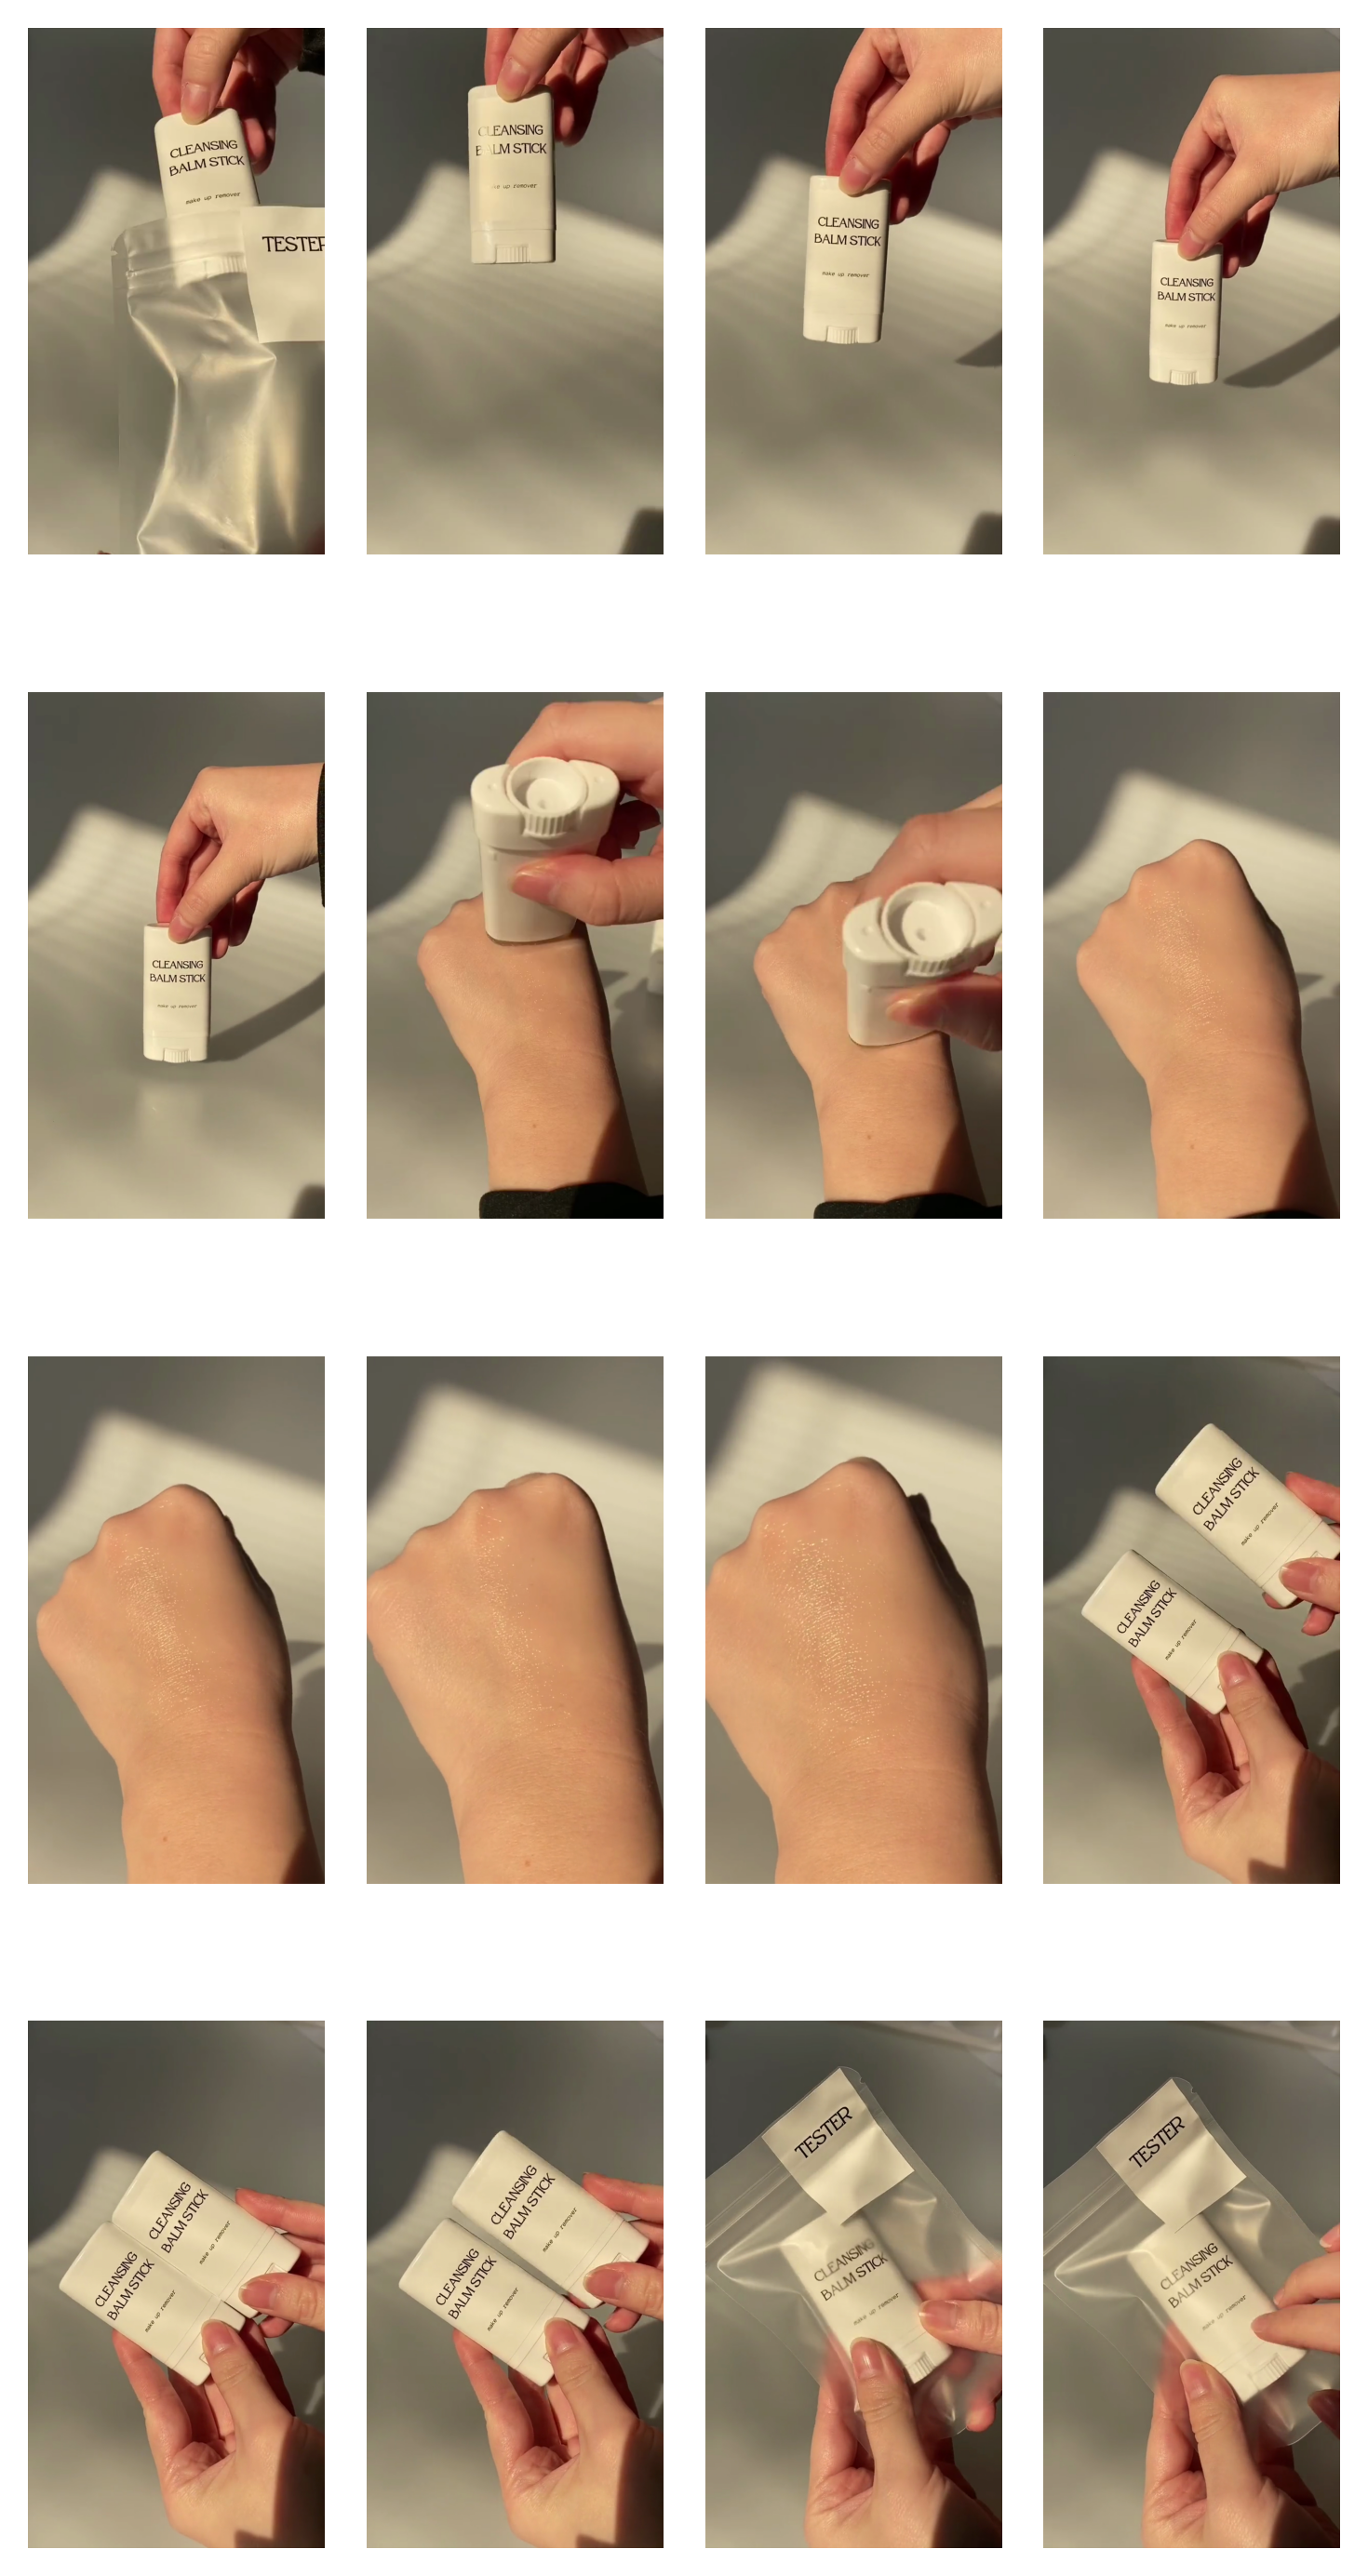

In [136]:
model,trans_frames,weight = models('mvit',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_mvit = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_mvit}")
    plot(frames,16,4,4,adjust_top=None,figsize=(5,10))

## SWIN3D Tiny

True: Skincare
Predict: unboxing


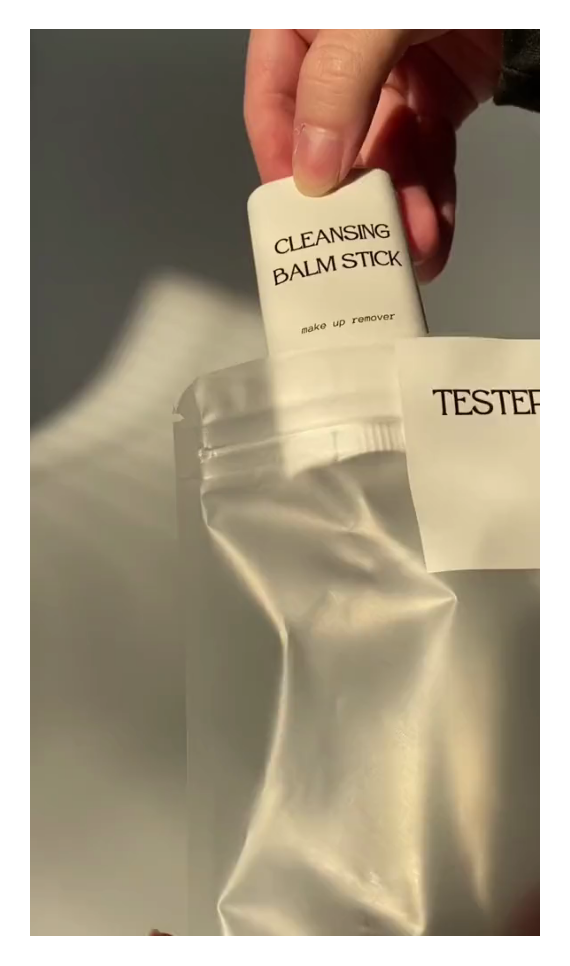

In [137]:
model,trans_frames,weight = models('swin',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_swin = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_swin}")
    plot(frames,1,1,1)

## Resnet 2+1D

True: Skincare
Predict: bookbinding


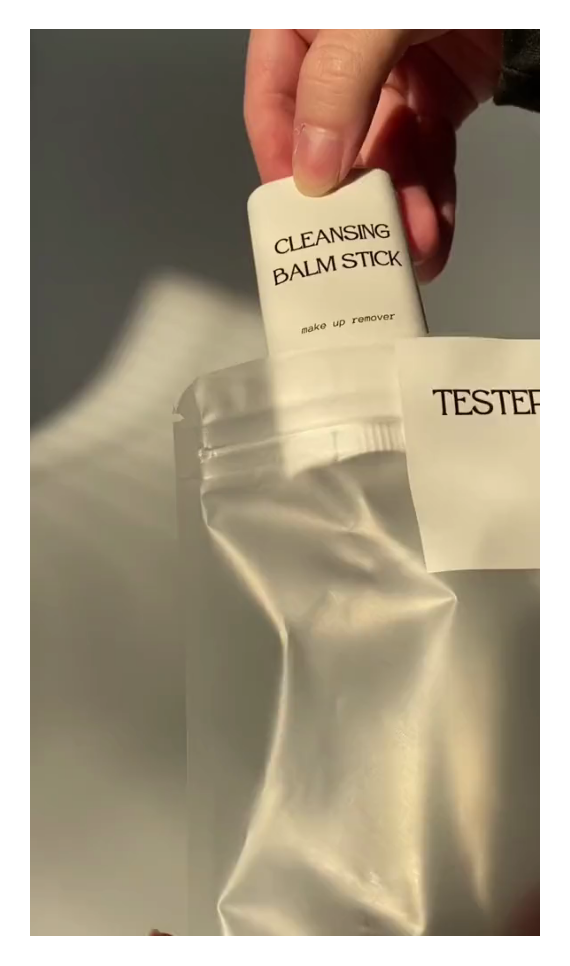

In [138]:
model,trans_frames,weight = models('resnet',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_res = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_res}")
    plot(frames,1,1,1)

In [139]:
print(f"True Label: {str.join(',',text_label)}\nMViT: {category_name_mvit}\nSWIN3D: {category_name_swin}\nResnet2+1D: {category_name_res}")

True Label: Skincare
MViT: unboxing
SWIN3D: unboxing
Resnet2+1D: bookbinding
